### Quick Start

The `ssms` package serves two purposes. 

1. Easy access to *fast simulators of sequential sampling models*
   
2. Support infrastructure to construct training data for various approaches to likelihood / posterior amortization

We provide two minimal examples here to illustrate how to use each of the two capabilities.


#### Install 

Let's start with *installing* the `ssms` package.

You can do so by typing,

`pip install git+https://github.com/AlexanderFengler/ssm_simulators`

in your terminal.

Below you find a basic tutorial on how to use the package.

#### Tutorial

In [6]:
# Import necessary packages
import numpy as np
import pandas as pd
import ssms

#### Using the Simulators

Let's start with using the basic simulators. 
You access the main simulators through the  `ssms.basic_simulators.simulator` function.

To get an idea about the models included in `ssms`, use the `config` module.
The central dictionary with metadata about included models sits in `ssms.config.model_config`. 

In [7]:
# Check included models
list(ssms.config.model_config.keys())[:10]

['ddm',
 'ddm_legacy',
 'angle',
 'weibull',
 'levy',
 'levy_angle',
 'full_ddm',
 'gamma_drift',
 'gamma_drift_angle',
 'ds_conflict_drift']

In [8]:
# Take an example config for a given model
my_model = "ddm_par2_no_bias"
my_config = ssms.config.model_config[my_model].copy()

**Note:**
The usual structure of these models includes,

- Parameter names (`'params'`)
- Bounds on the parameters (`'param_bounds'`)
- A function that defines a boundary for the respective model (`'boundary'`)
- The name of the boundary as a string(`'boundary_name'`)
- The number of parameters (`'n_params'`)
- Defaults for the parameters (`'default_params'`)
- The number of choices the process can produce (`'nchoices'`)
- The simulator function that is attached to the model (`'simulator'`)

Some models also include:
- A function for the drift over time (`'drift'`)
- The name of the corresponding drift as a string (`'drift_name'`)

In [9]:
from ssms.basic_simulators.simulator import simulator
from matplotlib import pyplot as plt

sim_out = simulator(
    model=my_model,
    theta=my_config["default_params"],
    n_samples=100,
    smooth_unif=True,
)

In [104]:
my_config

{'name': 'ddm_seq2_no_bias',
 'params': ['vh', 'vl1', 'vl2', 'a', 't'],
 'param_bounds': [[-4.0, -4.0, -4.0, 0.3, 0.0], [4.0, 4.0, 4.0, 2.5, 2.0]],
 'boundary_name': 'constant',
 'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'n_params': 5,
 'default_params': [0.0, 0.0, 0.0, 1.0, 1.0],
 'nchoices': 4,
 'simulator': <cyfunction ddm_flexbound_seq2 at 0x137982400>}

In [14]:
{
    key: val
    for val, key in zip(
        np.random.uniform(
            low=my_config["param_bounds"][0], high=my_config["param_bounds"][1]
        ),
        my_config["params"],
    )
}

{'vh': -2.323953064906286,
 'vl1': -3.791427355095448,
 'vl2': 3.260937123965145,
 'a': 1.6050307093282554,
 't': 1.8736654818279166}

In [5]:
sim_out = simulator(
    model=my_model,
    theta=out_dict[824]["parameters"],
    n_samples=10000,
    smooth_unif=False,
)

NameError: name 'out_dict' is not defined

In [88]:
np.unique(sim_out["choices"])

array([0, 1, 2, 3, 4], dtype=int32)

In [7]:
out_list = []
for i in range(10000):
    r_c = np.random.choice(400000000)
    sim_out = simulator(
        model=my_model,
        theta=out_dict[824]["parameters"],
        n_samples=2,
        smooth_unif=False,
        random_state=r_c,
    )
    out_list.append(sim_out["rts"][0][0])
    if np.any(sim_out["choices"] == 4):
        print("found")
        break

# out_dict[929]['parameters']

NameError: name 'out_dict' is not defined

In [97]:
sim_out["choices"]

array([[3],
       [4]], dtype=int32)

In [98]:
sim_out["rts"]

array([[11.130565],
       [21.544958]], dtype=float32)

In [99]:
sim_out["metadata"]

{'vh': array([0.5277909], dtype=float32),
 'vl1': array([0.71081024], dtype=float32),
 'vl2': array([0.22533932], dtype=float32),
 'a': array([2.4202616], dtype=float32),
 'zh': array([0.5], dtype=float32),
 'zl1': array([0.5], dtype=float32),
 'zl2': array([0.5], dtype=float32),
 't': array([1.5443212], dtype=float32),
 'deadline': array([999.], dtype=float32),
 's': 1.0,
 'delta_t': 0.0010000000474974513,
 'max_t': 20.0,
 'n_samples': 2,
 'n_trials': 1,
 'simulator': 'ddm_flexbound',
 'boundary_fun_type': 'constant',
 'trajectory': array([[ 0.0000000e+00, -9.9900000e+02, -9.9900000e+02],
        [-2.3331642e-02, -9.9900000e+02, -9.9900000e+02],
        [ 1.0749355e-02, -9.9900000e+02, -9.9900000e+02],
        ...,
        [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
        [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
        [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02]], dtype=float32),
 'possible_choices': [0, 1, 2, 3],
 'boundary': array([2.4202616, 2.4202616, 2.4202

In [79]:
out_list

[7.58627,
 6.7178793,
 7.6812105,
 10.615387,
 12.098809,
 8.633944,
 21.544958,
 5.1880507,
 8.502035,
 8.951659,
 5.4082255,
 8.705073,
 21.544958,
 9.261602,
 9.46111,
 5.938416,
 16.515276,
 14.703236,
 10.84083,
 7.176602,
 5.41585,
 7.6831455,
 10.151339,
 12.561176,
 11.112446,
 9.046411,
 13.8330345,
 6.7069683,
 9.669086,
 13.142884,
 8.67725,
 9.150158,
 9.307777,
 5.5519967,
 9.494267,
 6.818038,
 7.9081926,
 4.739583,
 9.501506,
 13.927117,
 8.673901,
 5.481047,
 7.4008594,
 11.021868,
 6.2677436,
 8.37978,
 14.222358,
 6.399958,
 7.109347,
 12.832298,
 19.348269,
 7.204999,
 12.988373,
 5.1288724,
 10.278271,
 15.692021,
 8.776708,
 19.21206,
 17.014305,
 6.875859,
 13.848945,
 11.543637,
 6.3931766,
 19.92183,
 12.470913,
 10.478269,
 17.688492,
 8.425837,
 9.519363,
 8.7734375,
 8.305681,
 17.283611,
 12.790811,
 17.906921,
 5.385459,
 9.914501,
 17.403648,
 9.999567,
 21.544958,
 4.846226,
 7.019953,
 6.808021,
 3.6890676,
 7.1574626,
 17.587317,
 8.628747,
 5.476718,
 

In [69]:
out_list

[7.1484146,
 12.152801,
 5.794382,
 5.640423,
 16.931822,
 5.529485,
 6.346892,
 11.237267,
 8.834462,
 8.018835,
 14.924439,
 21.544958,
 19.094114,
 17.308477,
 10.940966,
 18.935581,
 12.967162,
 13.740764,
 10.347689,
 12.109248,
 16.717886,
 8.457187,
 9.0193205,
 6.3657722,
 11.375217,
 11.045918,
 6.363723,
 7.411349,
 8.226169,
 4.8304234,
 8.990082,
 6.0668783,
 7.01199,
 21.544958,
 8.741458,
 13.873817,
 5.8633947,
 8.466236,
 7.863739,
 8.59536,
 10.346243,
 5.497031,
 14.816239,
 13.967312,
 6.741535,
 6.8225775,
 12.314196,
 8.039755,
 6.708545,
 17.675356,
 19.873625,
 9.534212,
 17.211737,
 12.451903,
 10.700469,
 10.245867,
 5.6945972,
 6.791009,
 7.178957,
 11.799995,
 18.293667,
 4.7890224,
 17.551949,
 8.620539,
 9.257178,
 3.7779565,
 8.801418,
 7.073455,
 19.19157,
 8.56385,
 5.9177384,
 21.544958,
 6.3674655,
 12.016483,
 3.717805,
 5.9003067,
 8.515577,
 21.544958,
 3.7010536,
 6.6295133,
 10.140922,
 10.630083,
 12.359133,
 10.116474,
 10.437362,
 6.0485215,
 1

In [82]:
sim_out["choices"]

array([[3],
       [4]], dtype=int32)

In [48]:
sim_out["choices"][0, 0] == 2

True

In [44]:
sim_out["metadata"]

{'vh': array([0.5277909], dtype=float32),
 'vl1': array([0.71081024], dtype=float32),
 'vl2': array([0.22533932], dtype=float32),
 'a': array([2.4202616], dtype=float32),
 'zh': array([0.5], dtype=float32),
 'zl1': array([0.5], dtype=float32),
 'zl2': array([0.5], dtype=float32),
 't': array([1.5443212], dtype=float32),
 'deadline': array([999.], dtype=float32),
 's': 1.0,
 'delta_t': 0.0010000000474974513,
 'max_t': 20.0,
 'n_samples': 10000,
 'n_trials': 1,
 'simulator': 'ddm_flexbound',
 'boundary_fun_type': 'constant',
 'trajectory': array([[ 0.0000000e+00, -9.9900000e+02, -9.9900000e+02],
        [ 5.8271825e-02, -9.9900000e+02, -9.9900000e+02],
        [ 9.4294719e-02, -9.9900000e+02, -9.9900000e+02],
        ...,
        [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
        [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
        [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02]], dtype=float32),
 'possible_choices': [0, 1, 2, 3],
 'boundary': array([2.4202616, 2.4202616, 2.

In [40]:
np.unique(sim_out["choices"])

array([0, 1, 2, 3, 4], dtype=int32)

In [41]:
sim_out["choices"][sim_out["choices"] == 4]

array([4, 4], dtype=int32)

In [42]:
sim_out["rts"][sim_out["choices"] == 4]

array([21.544958, 21.544958], dtype=float32)

(array([ 6.,  7.,  8., 12.,  7., 19., 21., 19., 16., 15., 20., 35., 25.,
        26., 27., 24., 29., 28., 25., 20., 27., 15., 23., 23., 19., 24.,
        18., 22., 16., 21., 13., 21., 19., 13.,  9.,  6., 18., 13., 17.,
        14., 11., 10.,  8.,  9., 11.,  7.,  1.,  9.,  3., 12.,  9.,  6.,
         6.,  5.,  3.,  7.,  4.,  4.,  5.,  3.,  3.,  5.,  7.,  3.,  4.,
         5., 10.,  7.,  3.,  5.,  1.,  1.,  2.,  1.,  4.,  2.,  1.,  1.,
         3.,  6.,  3.,  1.,  4.,  4.,  1.,  3.,  3.,  0.,  0.,  1.,  1.,
         0.,  3.,  1.,  2.,  0.,  0.,  2.,  2., 22.]),
 array([ 2.98611689,  3.17606044,  3.36600423,  3.55594778,  3.74589133,
         3.93583488,  4.12577868,  4.31572199,  4.50566578,  4.69560957,
         4.88555288,  5.07549667,  5.26544046,  5.45538378,  5.64532757,
         5.83527088,  6.02521467,  6.21515846,  6.40510178,  6.59504557,
         6.78498936,  6.97493267,  7.16487646,  7.35481977,  7.54476357,
         7.73470736,  7.92465067,  8.11459446,  8.30453777,  8.494482

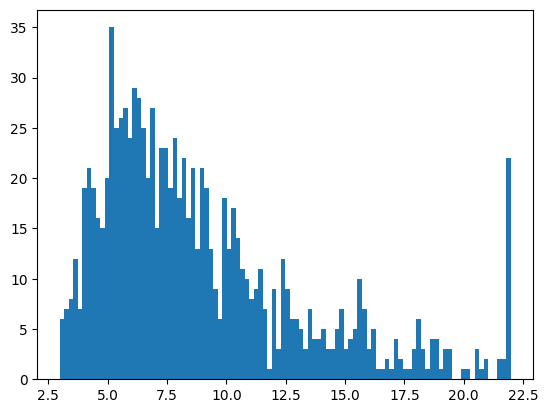

In [29]:
plt.hist(sim_out["rts"], bins=100)

In [27]:
sim_out["rts"][sim_out["choices"] == 4]

array([21.980478, 21.980478], dtype=float32)

In [31]:
help(simulator)

Help on function simulator in module ssms.basic_simulators.simulator:

simulator(theta, model='angle', n_samples=1000, delta_t=0.001, max_t=20, no_noise=False, bin_dim=None, bin_pointwise=False, smooth_unif=True, return_option='full', random_state=None)
    Basic data simulator for the models included in HDDM.
    
    Arguments
    ---------
        theta : list, numpy.array, dict or pd.DataFrame
            Parameters of the simulator. If 2d array, each row is treated as a 'trial'
            and the function runs n_sample * n_trials simulations.
        deadline : numpy.array <default=None>
            If supplied, the simulator will run a deadline model. RTs will be returned
        model: str <default='angle'>
            Determines the model that will be simulated.
        n_samples: int <default=1000>
            Number of simulation runs for each row in the theta argument.
        delta_t: float
            Size fo timesteps in simulator (conceptually measured in seconds)
     

In [10]:
out_dict = {}

for i in range(1000):
    tmp_param_dict = {
        key: val
        for val, key in zip(
            np.random.uniform(
                low=my_config["param_bounds"][0], high=my_config["param_bounds"][1]
            ),
            my_config["params"],
        )
    }

    sim_out = simulator(
        model=my_model, theta=tmp_param_dict, n_samples=1000, smooth_unif=True, max_t=20
    )

    if i % 100 == 0:
        print(i)
    out_dict[i] = {
        "unique_choices": np.unique(sim_out["choices"]),
        "parameters": tmp_param_dict,
    }

0
100
200
300
400
500
600
700
800
900


In [11]:
for key_ in out_dict.keys():
    # print(out_dict[key_]['unique_choices'])
    if 4 in out_dict[key_]["unique_choices"]:
        print(key_)
        break

In [16]:
unique_choices

[array([0, 1, 2], dtype=int32),
 array([1], dtype=int32),
 array([0, 2], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([2, 3], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 2, 3], dtype=int32),
 array([0], dtype=int32),
 array([1, 2, 3, 4], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 1], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 1], dtype=int32),
 array([2, 3], dtype=int32),
 array([3], dtype=int32),
 array([1], dtype=int32),
 array([1, 2], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 3], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([3], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0], dtype=int32),
 array([2], dtype=int32),
 array([0, 1, 2], dtype=int32),
 array([0, 1, 2, 3], dtype=int32),
 array([0, 1], dtype=int32),
 array([0, 1, 2], dtype=int32),
 array([0, 2, 3], dtype=int32),
 array

In [7]:
theta = {
    "v": np.array([1.1], dtype=np.float32),
    "a": np.array([1.65], dtype=np.float32),
    "z": np.array([0.5], dtype=np.float32),
    "alpha_diff": np.array([1.5], dtype=np.float32),
    "t": np.array([0.3], dtype=np.float32),
    "deadline": np.array([999.0], dtype=np.float32),
}
sim_stats = {
    "max_t": 20,
    "s": 1.0,
    "n_samples": 100,
    "n_trials": 1,
    "delta_t": 0.001,
    "random_state": None,
    "return_option": "full",
    "smooth": False,
}
boundary_config = ssms.config.boundary_config["constant"]
ssms.config.model_config["levy"]["simulator"](**theta, **boundary_config, **sim_stats)

TypeError: 'NoneType' object is not callable

In [9]:
ssms.config.boundary_config["constant"]

{'fun': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'params': [],
 'multiplicative': True}

In [13]:
ssms.model_config

AttributeError: module 'ssms' has no attribute 'model_config'

In [3]:
ssms.config.boundary_config[ssms.config.model_config["levy"]["boundary_name"]]

{'fun': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'params': [],
 'multiplicative': True}

In [5]:
sim_out

{'rts': array([[1.044994  ],
        [0.67699873],
        [2.095028  ],
        [0.83999664],
        [0.966995  ],
        [0.7159982 ],
        [1.3069911 ],
        [2.1710315 ],
        [0.5959997 ],
        [1.1979921 ],
        [0.69099855],
        [0.74699783],
        [1.6570075 ],
        [1.1549926 ],
        [0.8589964 ],
        [0.7409979 ],
        [1.2259917 ],
        [0.77999735],
        [0.6739987 ],
        [0.9769949 ],
        [1.4739988 ],
        [0.8449966 ],
        [1.1489927 ],
        [0.9569951 ],
        [0.66199887],
        [0.812997  ],
        [0.6999984 ],
        [1.4739988 ],
        [1.2239916 ],
        [0.6409992 ],
        [2.1110287 ],
        [0.9109957 ],
        [1.5370018 ],
        [1.3259919 ],
        [1.2389915 ],
        [0.9909947 ],
        [0.86999625],
        [1.5730035 ],
        [0.77199745],
        [1.371994  ],
        [1.0289942 ],
        [1.1279929 ],
        [1.0909934 ],
        [1.6090052 ],
        [0.8179969 ],
   

In [15]:
sim_out["omission_p"].shape

(1, 1)

Text(0, 0.5, 'Density')

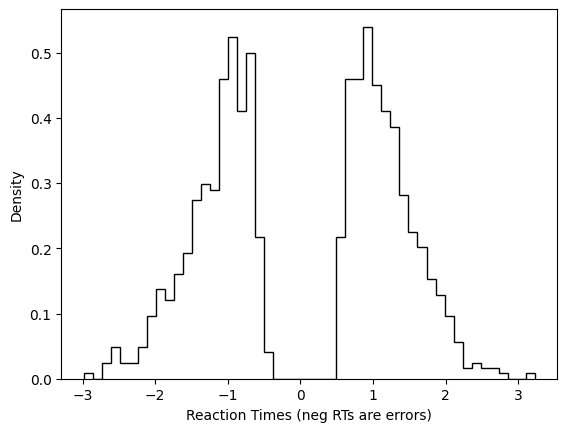

In [20]:
plt.hist(
    sim_out["rts"][sim_out["rts"] != -999] * sim_out["choices"][sim_out["rts"] != -999],
    bins=50,
    histtype="step",
    color="black",
    label="Weibull Deadline",
    density=True,
)
plt.xlabel("Reaction Times (neg RTs are errors)")
plt.ylabel("Density")

The output of the simulator is a `dictionary` with three elements.

1. `rts` (array)
2. `choices` (array)
3. `metadata` (dictionary)

The `metadata` includes the named parameters, simulator settings, and more.

#### Deadlines

You can actually attach a deadline to the simulator of every model, by simply attaching `_deadline` to the `model` argument in the `simulator()` function and passing an extra `deadline` parameter through the `theta` dictionary. Below an example.

In [12]:
sim_out_deadline = simulator(
    model="weibull_deadline",
    theta={
        "v": 0.0,
        "a": 1.65,
        "z": 0.5,
        "t": 0.3,
        "alpha": 0.6,
        "beta": 2.0,
        "deadline": 1.0,
    },
    n_samples=10000,
    smooth_unif=False,
)

[1.]


Samples that breached the deadline will have an `rt` of `-999`. We can plot the resulting reaction times below.

Text(0, 0.5, 'Density')

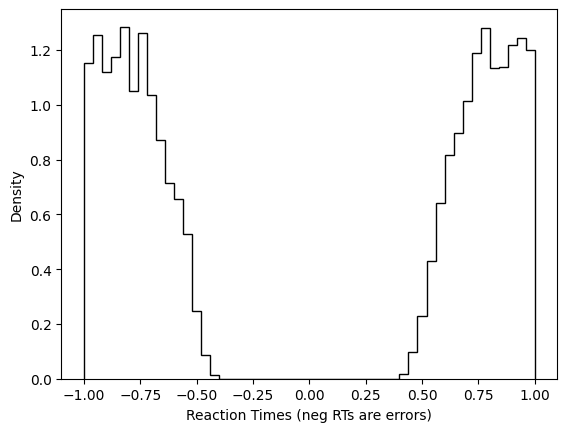

In [17]:
from matplotlib import pyplot as plt

plt.hist(
    sim_out_deadline["rts"][sim_out_deadline["rts"] != -999]
    * sim_out_deadline["choices"][sim_out_deadline["rts"] != -999],
    bins=50,
    histtype="step",
    color="black",
    label="Weibull Deadline",
    density=True,
)
plt.xlabel("Reaction Times (neg RTs are errors)")
plt.ylabel("Density")

#### Using the Training Data Generators

The training data generators sit on top of the simulator function to turn raw simulations into usable training data for training machine learning algorithms aimed at posterior or likelihood armortization.

We will use the `data_generator` class from `ssms.dataset_generators`. Initializing the `data_generator` boils down to supplying two configuration dictionaries.

1. The `generator_config`, concerns choices as to what kind of training data one wants to generate.
2. The `model_config` concerns choices with respect to the underlying generative *sequential sampling model*. 

We will consider a basic example here, concerning data generation to prepare for training [LANs](https://elifesciences.org/articles/65074).

Let's start by peeking at an example `generator_config`.

In [6]:
ssms.config.data_generator_config["lan"]

{'output_folder': 'data/lan_mlp/',
 'model': 'ddm',
 'nbins': 0,
 'n_samples': 100000,
 'n_parameter_sets': 10000,
 'n_parameter_sets_rejected': 100,
 'n_training_samples_by_parameter_set': 1000,
 'max_t': 20.0,
 'delta_t': 0.001,
 'pickleprotocol': 4,
 'n_cpus': 'all',
 'kde_data_mixture_probabilities': [0.8, 0.1, 0.1],
 'simulation_filters': {'mode': 20,
  'choice_cnt': 0,
  'mean_rt': 17,
  'std': 0,
  'mode_cnt_rel': 0.95},
 'negative_rt_cutoff': -66.77497,
 'n_subruns': 10,
 'bin_pointwise': False,
 'separate_response_channels': False,
 'smooth_unif': True}

You usually have to make just few changes to this basic configuration dictionary.
An example below.

In [7]:
from copy import deepcopy

# Initialize the generator config (for MLP LANs)
generator_config = deepcopy(ssms.config.data_generator_config["lan"])
# Specify generative model (one from the list of included models mentioned above)
generator_config["model"] = "ddm_deadline"
# Specify number of parameter sets to simulate
generator_config["n_parameter_sets"] = 1000
# Specify how many samples a simulation run should entail
generator_config["n_samples"] = 2000
generator_config["n_cpus"] = "all"
generator_config["smooth_unif"] = True

Now let's define our corresponding `model_config`.

In [8]:
model_config = ssms.config.model_config["ddm"]
print(model_config)

{'name': 'ddm', 'params': ['v', 'a', 'z', 't'], 'param_bounds': [[-3.0, 0.3, 0.1, 0.0], [3.0, 2.5, 0.9, 2.0]], 'boundary_name': 'constant', 'boundary': <function constant at 0x126b116c0>, 'boundary_params': [], 'n_params': 4, 'default_params': [0.0, 1.0, 0.5, 0.001], 'nchoices': 2, 'simulator': <cyfunction ddm_flexbound at 0x17b0ade50>}


We are now ready to initialize a `data_generator`, after which we can generate training data using the `generate_data_training_uniform` function, which will use the hypercube defined by our parameter bounds from the `model_config` to uniformly generate parameter sets and corresponding simulated datasets.

In [9]:
my_dataset_generator = ssms.dataset_generators.lan_mlp.data_generator(
    generator_config=generator_config, model_config=model_config
)

{'name': 'ddm_deadline', 'params': ['v', 'a', 'z', 't', 'deadline'], 'param_bounds': [[-3.0, 0.3, 0.1, 0.0, 0.001], [3.0, 2.5, 0.9, 2.0, 10]], 'boundary_name': 'constant', 'boundary': <function constant at 0x126b116c0>, 'boundary_params': [], 'n_params': 5, 'default_params': [0.0, 1.0, 0.5, 0.001, 10], 'nchoices': 2, 'simulator': <cyfunction ddm_flexbound at 0x17b0ade50>}
n_cpus used:  12
checking:  data/lan_mlp/


In [10]:
my_dataset_generator.model_config

{'name': 'ddm_deadline',
 'params': ['v', 'a', 'z', 't', 'deadline'],
 'param_bounds': [[-3.0, 0.3, 0.1, 0.0, 0.001], [3.0, 2.5, 0.9, 2.0, 10]],
 'boundary_name': 'constant',
 'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'boundary_params': [],
 'n_params': 5,
 'default_params': [0.0, 1.0, 0.5, 0.001, 10],
 'nchoices': 2,
 'simulator': <cyfunction ddm_flexbound at 0x17b0ade50>}

In [11]:
my_dataset_generator.generator_config

{'output_folder': 'data/lan_mlp/',
 'model': 'ddm_deadline',
 'nbins': 0,
 'n_samples': 2000,
 'n_parameter_sets': 1000,
 'n_parameter_sets_rejected': 100,
 'n_training_samples_by_parameter_set': 1000,
 'max_t': 20.0,
 'delta_t': 0.001,
 'pickleprotocol': 4,
 'n_cpus': 12,
 'kde_data_mixture_probabilities': [0.8, 0.1, 0.1],
 'simulation_filters': {'mode': 20,
  'choice_cnt': 0,
  'mean_rt': 17,
  'std': 0,
  'mode_cnt_rel': 0.95},
 'negative_rt_cutoff': -66.77497,
 'n_subruns': 10,
 'bin_pointwise': False,
 'separate_response_channels': False,
 'smooth_unif': True}

In [12]:
training_data = my_dataset_generator.generate_data_training_uniform(save=False)

simulation round: 1  of 10


simulation round: 2  of 10
simulation round: 3  of 10
simulation round: 4  of 10
simulation round: 5  of 10
simulation round: 6  of 10
simulation round: 7  of 10
simulation round: 8  of 10
simulation round: 9  of 10
simulation round: 10  of 10


`training_data` is a dictionary containing four keys:

1. `data` the features for [LANs](https://elifesciences.org/articles/65074), containing vectors of *model parameters*, as well as *rts* and *choices*.
2. `labels` which contain approximate likelihood values
3. `generator_config`, as defined above
4. `model_config`, as defined above

You can now use this training data for your purposes. If you want to train [LANs](https://elifesciences.org/articles/65074) yourself, you might find the [LANfactory](https://github.com/AlexanderFengler/LANfactory) package helpful.

You may also simply find the basic simulators provided with the **ssm-simulators** package useful, without any desire to use the outputs into training data for amortization purposes.

##### END